<h1 align="center">Comparison of 3 permutation algorithms</h1>

Inserting elements at the end of a list

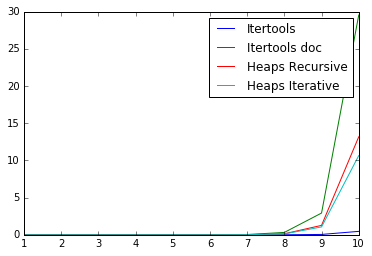

In [2]:
%matplotlib inline
from matplotlib.pyplot import plot, legend

import itertools
from time import time
import sys
sys.setrecursionlimit(10000)

# Recursive implementation of Heap's algorithm
def recursive_permute(L):
    yield from recursive_heap_permute(L, len(L))
    
def recursive_heap_permute(L, length):
    if length <= 1:
        yield L
    else:
        length -= 1
        for i in range(length):
            yield from recursive_heap_permute(L, length)
            if length % 2:
                L[i], L[length] = L[length], L[i]
            else:
                L[0], L[length] = L[length], L[0]
        yield from recursive_heap_permute(L, length)

# Iterative implementation of Heap's algorithm
def iterative_permute(L):
    yield L
    stack = [(0, i) for i in range(len(L) - 1, 0, -1)]
    while stack:
        low, high = stack.pop()
        if high % 2:
            L[low], L[high] = L[high], L[low]
        else:
            L[0], L[high] = L[high], L[0]
        yield L
        if low + 1 != high:
            stack.append((low + 1, high))
        for i in range(high - 1, 0, -1):
            stack.append((0, i))

# As documentated in the itertools module for its permutations() function.
def permutations(iterable, r=None):
    pool = tuple(iterable)
    n = len(pool)
    r = n if r is None else r
    indices = list(range(n))
    cycles = list(range(n-r+1, n+1)[::-1])
    yield tuple(pool[i] for i in indices[:r])
    while n:
        for i in reversed(range(r)):
            cycles[i] -= 1
            if cycles[i] == 0:
                indices[i:] = indices[i+1:] + indices[i:i+1]
                cycles[i] = n - i
            else:
                j = cycles[i]
                indices[i], indices[-j] = indices[-j], indices[i]
                yield tuple(pool[i] for i in indices[:r])
                break
        else:
            return


data = [], [], [], []
for i in range(1, 11):
    L = list(range(i))
    before = time()
    for _ in itertools.permutations(L):
        pass
    after = time()
    data[0].append((i, after - before))

    L = list(range(i))
    before = time()
    for _ in permutations(L):
        pass
    after = time()
    data[1].append((i, after - before))
    
    L = list(range(i))
    before = time()
    for _ in recursive_permute(L):
        list(_)
    after = time()
    data[2].append((i, after - before))

    L = list(range(i))
    before = time()
    for _ in iterative_permute(L):
        list(_)
    after = time()
    data[3].append((i, after - before))

labels = 'Itertools', 'Itertools doc', 'Heaps Recursive', 'Heaps Iterative'
for i in range(4):
    plot(*tuple(zip(*data[i])), label = labels[i])
legend()
print()